# World Data League 2021
## Notebook Template

This notebook is one of the mandatory deliverables when you submit your solution (alongside the video pitch). Its structure follows the WDL evaluation criteria and it has dedicated cells where you can add descriptions. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work.

The notebook must:

*   💻 have all the code that you want the jury to evaluate
*   🧱 follow the predefined structure
*   📄 have markdown descriptions where you find necessary
*   👀 be saved with all the output that you want the jury to see
*   🏃‍♂️ be runnable


## Introduction
Describe how you framed the challenge by telling us what problem are you trying to solve and how your solution solves that problem.

# **Model of integrated transports for senior citizens**

##**Goal:**
To understand the senior citizens' mobility patterns and their characteristics: We aim to
provide better conditions of mobility for our senior citizens, giving them the same
opportunities to arrive at their points of interest with affordable and accessible public
transport.

## **Outcome:**
A general model to design an integrated transportation service for the senior population,
or, an integrated transportation service for senior population proposal for one city.

##**Development**

### Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
bus_routes = pd.read_csv('https://raw.githubusercontent.com/Pravallika-Myneni/WDL-stage-1/main/Challenge-2/BusRoutes.txt',delimiter = '|', encoding='unicode_escape')
tim = pd.read_csv('https://raw.githubusercontent.com/Pravallika-Myneni/WDL-stage-1/main/Challenge-2/Senior_TIM_v1.txt', delimiter= '|', encoding='unicode_escape')

In [3]:
bus_routes.sample(5)

,IDRoute,linkid
22843,81,820936075
32580,119,835587333
20939,72,910760667
33202,121,1219532116
35833,129,575149335


In [4]:
tim.sample(5)

,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
11402,537304555,R1 - AM Lisboa,Lisboa,Cascais,326.484305
37032,575042637,R2 - AM Porto,Porto,Maia,664.650224
58379,806649664,R1 - AM Lisboa,Setúbal,Palmela,96.024796
105358,1162142500,R2 - AM Porto,Porto,Maia,498.487668
9197,537286231,R1 - AM Lisboa,Lisboa,Amadora,115.577130


### Performing EDA

EDA on bus_routes

In [5]:
bus_routes.shape

(48312, 2)

In [6]:
bus_routes.isna().sum()

IDRoute    0
linkid     0
dtype: int64

In [7]:
bus_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48312 entries, 0 to 48311
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   IDRoute  48312 non-null  int64
 1   linkid   48312 non-null  int64
dtypes: int64(2)
memory usage: 755.0 KB


In [8]:
bus_routes.describe()

,IDRoute,linkid
count,48312.000000,4.831200e+04
mean,85.868004,8.499212e+08
std,47.541467,2.610475e+08
min,1.000000,8.021680e+07
25%,46.000000,5.751449e+08
50%,85.000000,8.514187e+08
75%,130.000000,1.160021e+09
max,166.000000,1.252616e+09


In [9]:
len(set(bus_routes['IDRoute']))

166

In [10]:
len(set(bus_routes['linkid']))

19277

In [11]:
grouped_by_route_id = bus_routes.groupby('IDRoute')
df = pd.DataFrame(grouped_by_route_id)
df

,0,1
0,1,IDRoute linkid 0 1 53727730...
1,2,IDRoute linkid 91 2 537277...
2,3,IDRoute linkid 353 3 537279...
3,4,IDRoute linkid 537 4 80218...
4,5,IDRoute linkid 838 5 802...
...,...,...
161,162,IDRoute linkid 47453 162 53...
162,163,IDRoute linkid 47871 163 54...
163,164,IDRoute linkid 47985 164 54...
164,165,IDRoute linkid 48052 165 54...


In [12]:
bus_route_with_id = {i:[] for i in range(1, 167)}


In [13]:
bus_routes.groupby('IDRoute').count()

,linkid
IDRoute,
1,91
2,262
3,184
4,301
5,494
...,...
162,418
163,114
164,67


In [14]:
#list(bus_routes.loc[bus_routes['IDRoute']==1]['linkid'])

In [15]:
merged_df = pd.merge(bus_routes, tim, how = 'inner', on =['linkid'])
merged_df.sample(5)

,IDRoute,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
29061,67,1212244116,R1 - AM Lisboa,Lisboa,Lisboa,458.180766
44676,94,1166841397,R1 - AM Lisboa,Lisboa,Vila Franca de Xira,165.110186
55328,124,1060536983,R2 - AM Porto,Porto,Maia,221.550075
48682,123,1213162723,R2 - AM Porto,Porto,Porto,3036.203288
33220,33,537282683,R1 - AM Lisboa,Lisboa,Vila Franca de Xira,88.905485


### EDA on merged dataframe

In [16]:
merged_df.shape

(60181, 6)

In [17]:
merged_df.columns

Index(['IDRoute', 'linkid', 'Region_of_Origin', 'District_of_Origin',
       'County_of_Origin', 'Average_Daily_SeniorPopulation_Travelling'],
      dtype='object')

In [18]:
merged_df.isna().sum()

IDRoute                                      0
linkid                                       0
Region_of_Origin                             0
District_of_Origin                           0
County_of_Origin                             0
Average_Daily_SeniorPopulation_Travelling    0
dtype: int64

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60181 entries, 0 to 60180
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   IDRoute                                    60181 non-null  int64  
 1   linkid                                     60181 non-null  int64  
 2   Region_of_Origin                           60181 non-null  object 
 3   District_of_Origin                         60181 non-null  object 
 4   County_of_Origin                           60181 non-null  object 
 5   Average_Daily_SeniorPopulation_Travelling  60181 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.2+ MB


In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60181 entries, 0 to 60180
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   IDRoute                                    60181 non-null  int64  
 1   linkid                                     60181 non-null  int64  
 2   Region_of_Origin                           60181 non-null  object 
 3   District_of_Origin                         60181 non-null  object 
 4   County_of_Origin                           60181 non-null  object 
 5   Average_Daily_SeniorPopulation_Travelling  60181 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.2+ MB


In [21]:
merged_df.describe()

,IDRoute,linkid,Average_Daily_SeniorPopulation_Travelling
count,60181.000000,6.018100e+04,60181.000000
mean,67.964756,8.284400e+08,1028.561153
std,43.845876,2.567768e+08,2184.997299
min,1.000000,8.021681e+07,21.704987
25%,35.000000,5.453637e+08,136.035127
50%,63.000000,8.329430e+08,326.484305
75%,99.000000,9.906503e+08,833.829727
max,166.000000,1.223275e+09,28955.439208


### Analyzing each column

In [22]:
merged_df.columns

Index(['IDRoute', 'linkid', 'Region_of_Origin', 'District_of_Origin',
       'County_of_Origin', 'Average_Daily_SeniorPopulation_Travelling'],
      dtype='object')

#### IDRoute

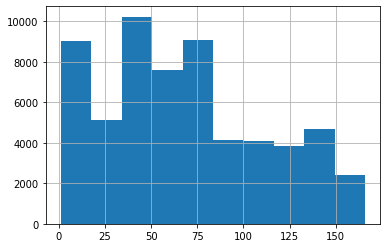

In [23]:
merged_df['IDRoute'].hist()

####linkid

In [24]:
len(set(merged_df['linkid']))

9327

####Region_of_origin

In [25]:
set(merged_df['Region_of_Origin'])

{'R1 - AM Lisboa', 'R2 - AM Porto'}

In [26]:
n = merged_df.shape[0]
print('R1 - AM Lisboa ',len(merged_df[merged_df['Region_of_Origin']=='R1 - AM Lisboa'])/n*100)
print('R2 - AM Porto ',len(merged_df[merged_df['Region_of_Origin']=='R2 - AM Porto'])/n*100)

R1 - AM Lisboa  75.70495671391303
R2 - AM Porto  24.29504328608697


####District of origin

In [27]:
set(merged_df['District_of_Origin'])

{'Aveiro', 'Lisboa', 'Porto', 'Setúbal'}

In [28]:
n = merged_df.shape[0]
print('Aveiro ',len(merged_df[merged_df['District_of_Origin']=='Aveiro'])/n*100)
print('Lisboa ',len(merged_df[merged_df['District_of_Origin']=='Lisboa'])/n*100)
print('Porto ',len(merged_df[merged_df['District_of_Origin']=='Porto'])/n*100)
print('Setúbal ',len(merged_df[merged_df['District_of_Origin']=='Setúbal'])/n*100)



Aveiro  0.17779697911300907
Lisboa  60.979378873730916
Porto  24.11724630697396
Setúbal  14.725577840182117


####county of origin

In [29]:
c= set(merged_df['County_of_Origin'])
print(c, len(c))

{'Porto', 'Sesimbra', 'Oeiras', 'Loures', 'Sintra', 'Seixal', 'Matosinhos', 'Vila Franca de Xira', 'Almada', 'Maia', 'Palmela', 'Gondomar', 'Mafra', 'Barreiro', 'Cascais', 'Alcochete', 'Montijo', 'Odivelas', 'Setúbal', 'Amadora', 'Santa Maria da Feira', 'Lisboa'} 22


In [30]:
fig = px.histogram(merged_df, x= 'County_of_Origin')
fig.show()

#### Average_Daily_SeniorPopulation_Travelling



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution')

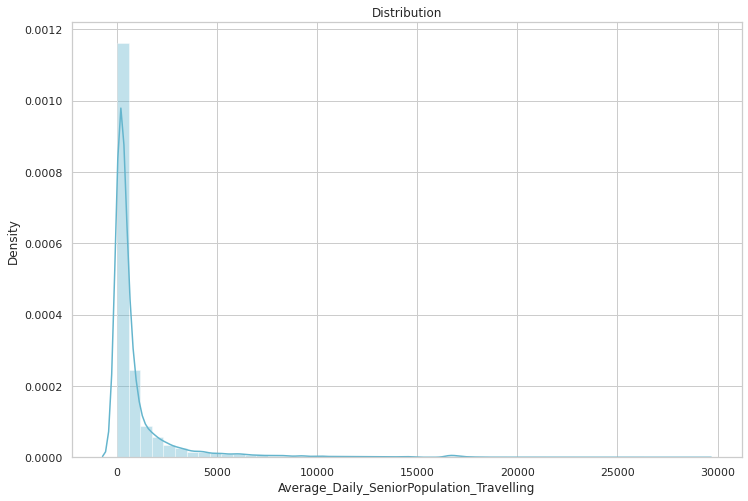

In [31]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(merged_df['Average_Daily_SeniorPopulation_Travelling'], kde = True, color = 'c')
plt.title('Distribution')

In [32]:
#sns.boxplot(x='Region_of_Origin', y='Average_Daily_SeniorPopulation_Travelling', data=merged_df)

###Encoding the categorical data

In [33]:
merged_df_1 = merged_df.copy()
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
merged_df['Region_of_Origin'] = number.fit_transform(merged_df['Region_of_Origin'].astype('str'))
merged_df['County_of_Origin'] = number.fit_transform(merged_df['County_of_Origin'].astype('str'))
merged_df['District_of_Origin'] = number.fit_transform(merged_df['District_of_Origin'].astype('str'))
le_name_mapping = dict(zip(number.classes_, number.transform(number.classes_)))
print(le_name_mapping)

{'Aveiro': 0, 'Lisboa': 1, 'Porto': 2, 'Setúbal': 3}


In [34]:
merged_df.sample(3)

,IDRoute,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
45519,140,835530672,0,1,13,88.905485
7136,5,537276070,0,3,17,720.238728
11175,78,1213344304,0,1,6,326.470174


In [35]:
merged_df_1.sample(3)

,IDRoute,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
15202,18,771949327,R1 - AM Lisboa,Lisboa,Oeiras,105.070118
17785,8,545356740,R1 - AM Lisboa,Lisboa,Vila Franca de Xira,85.916922
21040,30,593894277,R1 - AM Lisboa,Lisboa,Oeiras,82.555093


###Finding Correlation 

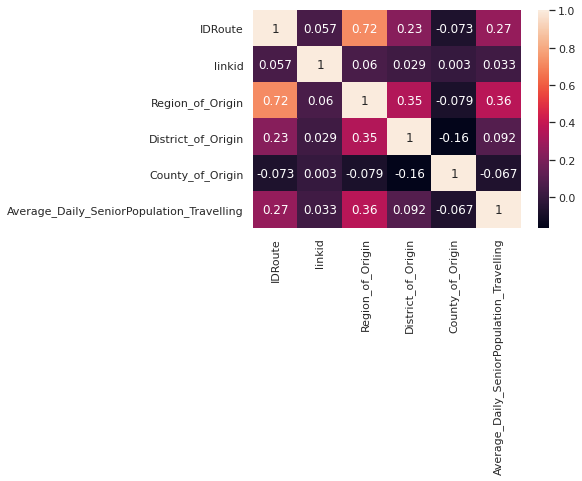

In [36]:
corrr = merged_df.corr()
sns.heatmap(corrr, annot = True)

#**Pattern Recognition**

Analyzing the relation between columns with positive correlation

In [37]:
corrr['Average_Daily_SeniorPopulation_Travelling'].sort_values()

County_of_Origin                            -0.066740
linkid                                       0.033072
District_of_Origin                           0.092299
IDRoute                                      0.271006
Region_of_Origin                             0.364833
Average_Daily_SeniorPopulation_Travelling    1.000000
Name: Average_Daily_SeniorPopulation_Travelling, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



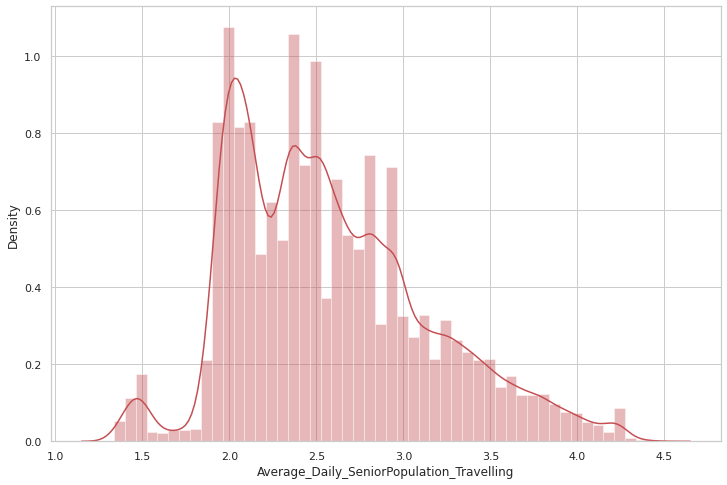

In [38]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(merged_df_1['Average_Daily_SeniorPopulation_Travelling']), kde = True, color = 'r' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



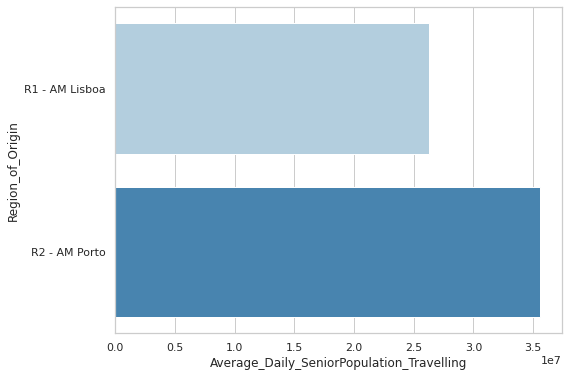

In [39]:
charges = merged_df_1['Average_Daily_SeniorPopulation_Travelling'].groupby(merged_df_1.Region_of_Origin).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

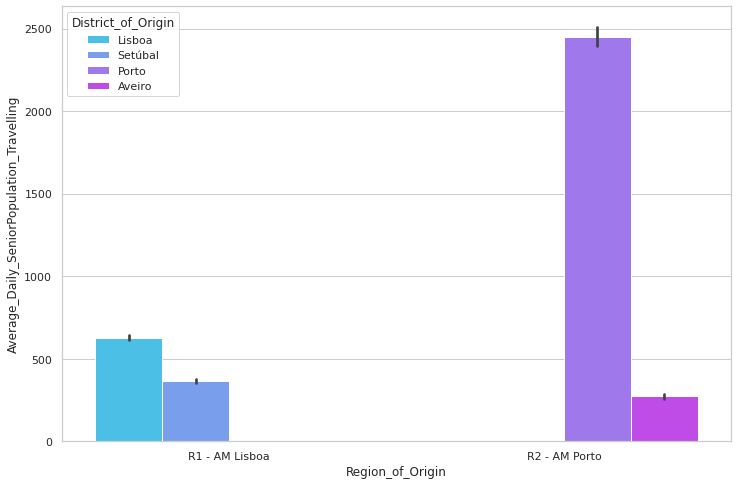

In [40]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Region_of_Origin', y='Average_Daily_SeniorPopulation_Travelling', hue='District_of_Origin', data=merged_df_1, palette='cool')

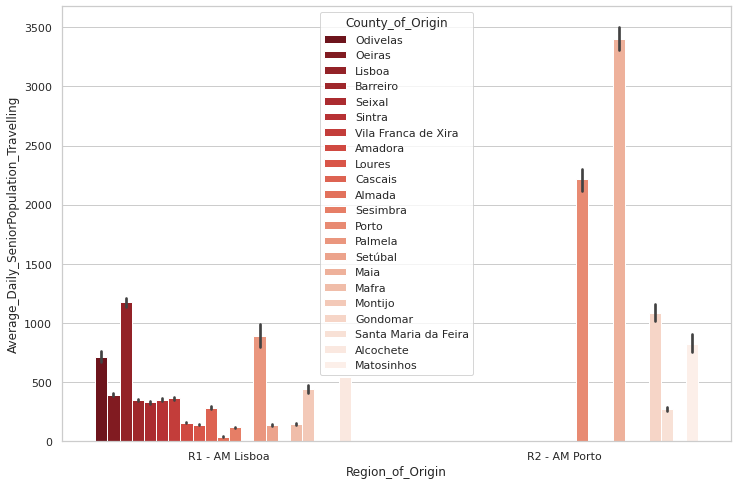

In [41]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Region_of_Origin', y='Average_Daily_SeniorPopulation_Travelling', hue='County_of_Origin', data=merged_df_1, palette='Reds_r')

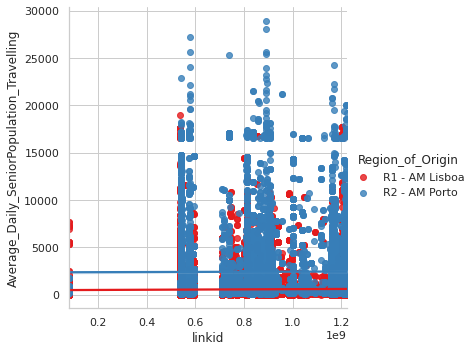

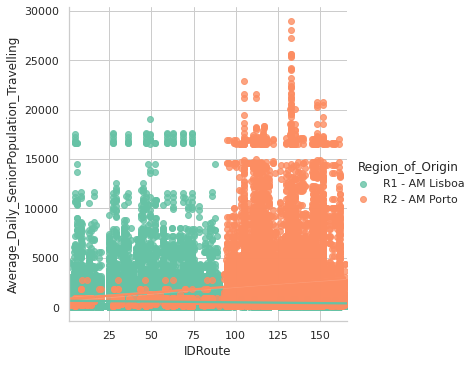

In [42]:
ax = sns.lmplot(x = 'linkid', y = 'Average_Daily_SeniorPopulation_Travelling', data=merged_df_1, hue='Region_of_Origin', palette='Set1')
ax = sns.lmplot(x = 'IDRoute', y = 'Average_Daily_SeniorPopulation_Travelling', data= merged_df_1, hue='Region_of_Origin', palette='Set2')

In [43]:
fig = px.scatter_3d(merged_df_1, x = 'IDRoute', y = 'District_of_Origin', z = 'Average_Daily_SeniorPopulation_Travelling', color = 'Region_of_Origin')
fig.show()

###Developing a model

In [44]:
merged_df = merged_df.drop(columns= ['County_of_Origin'])

In [45]:
X = merged_df.drop(columns= ['Average_Daily_SeniorPopulation_Travelling'])
y = merged_df['Average_Daily_SeniorPopulation_Travelling']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

**Linear Regression**

In [48]:
import numpy as np
from sklearn.linear_model import LinearRegression

lin = LinearRegression().fit(X_train, y_train)

y_pred = lin.predict(X_test)
print('Coefficients:', lin.coef_)
print('Intercept:', lin.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [ 7.96946778e-01  6.83238956e-08  1.85962152e+03 -1.11930350e+02]
Intercept: 634.6318408319487
Mean squared error (MSE): 4115962.29
Coefficient of determination (R^2): 0.14


**Polynomial Regression** 

In [49]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)
model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly_test)
rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
r2 = r2_score(y_test,y_poly_pred)
print(rmse)
print(r2)

2035.5323628841204
0.13104969084442641


**Principal Component regression**


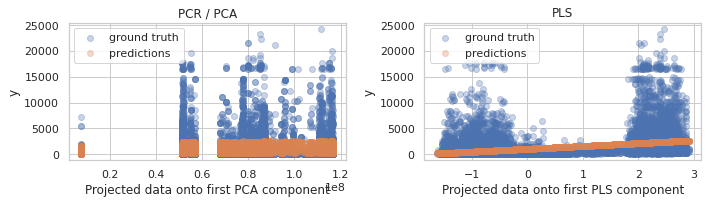

PCR r-squared 0.107
PLS r-squared 0.119
PCR r-squared with 2 components 0.074


In [50]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
pca = PCA(n_components=2).fit(X)
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps['pca']  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=.3, label='ground truth')
axes[0].scatter(pca.transform(X_test), pcr.predict(X_test), alpha=.3,
                label='predictions')
axes[0].set(xlabel='Projected data onto first PCA component',
            ylabel='y', title='PCR / PCA')
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=.3, label='ground truth')
axes[1].scatter(pls.transform(X_test), pls.predict(X_test), alpha=.3,
                label='predictions')
axes[1].set(xlabel='Projected data onto first PLS component',
            ylabel='y', title='PLS')
axes[1].legend()
plt.tight_layout()
plt.show()
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")
pca_2 = make_pipeline(PCA(n_components=2), LinearRegression())
pca_2.fit(X_train, y_train)
print(f"PCR r-squared with 2 components {pca_2.score(X_test, y_test):.3f}")

**Partial Least Squares Regression**

In [51]:
from sklearn import tree
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(X_train,y_train)
#y1_dec=dec.predict(X_train)
#y1_dec=list(y1_dec)
y2_dec=dec.predict(X_test)
#y2_dec=list(y2_dec)
print(r2_score(y2_dec,y_test))

-5.508658780411396


**Bayesian Regression model**

In [52]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train,y_train)
y1_reg=reg.predict(X_train)
y1_reg=list(y1_reg)
y2_reg=reg.predict(X_test)
#y2_reg=list(y2_reg)
print("Bayesian Regression r-squared{0}",format(r2_score(y2_reg, y_test)))

Bayesian Regression r-squared{0} -5.430450681003658


###Taking input from user

In [53]:
#@title User Input
user_input_idroute =  1#@param {type:"integer"}
user_input_linkid =  1#@param {type:"integer"}
user_input_region_of_origin = "R1 - AM Lisboa" #@param ["R1 - AM Lisboa", "R2 - AM Porto"]
user_input_district_of_origin = 'Aveiro' #@param ['Aveiro', 'Lisboa', 'Porto', 'Setúbal']
user_input_county_of_origin = 'Amadora' #@param ['Amadora', 'Vila Franca de Xira', 'Gondomar', 'Lisboa', 'Odivelas', 'Setúbal', 'Palmela', 'Santa Maria da Feira', 'Alcochete', 'Sesimbra', 'Oeiras', 'Porto', 'Maia', 'Cascais', 'Matosinhos', 'Sintra', 'Barreiro', 'Montijo', 'Almada', 'Loures', 'Mafra', 'Seixal']


In [54]:
user_input = {'IDRoute': [user_input_idroute], 'linkid': [user_input_linkid] , 'Region_of_Origin': [user_input_region_of_origin], 'District_of_Origin': [user_input_district_of_origin],
       'County_of_Origin': [user_input_county_of_origin]}

Performing all the preprocessing done on dataframe here: Encoding, dropping columns

In [55]:
user_input = pd.DataFrame(user_input)
user_input

,IDRoute,linkid,Region_of_Origin,District_of_Origin,County_of_Origin
0,1,1,R1 - AM Lisboa,Aveiro,Amadora


Using the model with highest accuracy to predict the value

In [56]:
user_input['Region_of_Origin'] = user_input['Region_of_Origin'].apply(lambda x: 1 if x=='R2 - AM Porto' else 0)
user_input['District_of_Origin'] = user_input['District_of_Origin'].apply(lambda x: 1 if x=='Lisboa' else (2 if x=='Porto' else (3 if x=='Setúbal' else 0)))
user_input = user_input.drop(columns= ['County_of_Origin'])

In [57]:
print(lin.predict(user_input))

[635.42878768]


If the Average_Daily_SeniorPopulation_Travelling is known for given user input we can add the data to merged dataframe

In [58]:
#@title Is the output "Average_Daily_SeniorPopulation_Travelling" known for given input
user_input_target =  'Yes' #@param ['Yes','No']

In [59]:
if user_input_target == 'Yes':
  #@title "Average_Daily_SeniorPopulation_Travelling" known for given input
  user_input_target =  "1000" #@param {type:"string"}
  user_input_target = float(user_input_target)
  user_input['Average_Daily_SeniorPopulation_Travelling'] = user_input_target
  merged_df.append(user_input, ignore_index=True)

## Conclusions

1. The Average senior population who use the public transport is  mostly dependent on Region of Origin and IDRoute and not at at all dependent on the County of Origin.
2. Most of senior population using public transport hail from Porto Distict

3. Compared several model 
4. Model with feedback

#**Git Hub Repo Link:** [click here](https://github.com/Pravallika-Myneni/WDL-stage-1)